In [1]:
import numpy as np        
import matplotlib.pyplot as plt 
import pandas as pd            
import seaborn as sns           
import sklearn                  

# Описание задачи
Требуется предсказать по заданным признакам - выплататит ли новый клиент взятый им кредит, или нет (одобрить/не одобрять)
За это отвечает целевая переменная `BAD`
- `BAD`- целевая переменная, 1 - клиент не выплатил кредит, 0 - кредит погашен
- `LOAN` - сумма кредита
- `MORTDUE` - сумма к оплате по существующей ипотеке
- `VALUE` - стоимость текущего имущества
- `REASON` - `DeptCon` - консолидация долга(погашение другого долга), `HomeImp` - улучшение дома, причина взятия ссуды
- `JOB` - профессианальная категория
- `YOJ` - лет на настоящей работе (years of work)
- `DEROG` - кол-во плохих отзывов о клиенте
- `DELINQ` - кол-во просреченных кредитных линий
- `CLAGUE` - возраст самой старой торговой линии в месяцах
- `NINQ` - кол-во последних кредитных линий
- `CLNO` - кол-во кредитных линий
- `DEBTINIC` - отношение долга к доходу

## Загрузка данных

In [7]:
url = "https://raw.githubusercontent.com/AlexeyKumin/ml-course/master/hmeq.csv"
data = pd.read_csv(url)
data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


# Основные характеристики и визуализация
для начала посмотрим на типы признаков

In [12]:
for i in data.columns:
    print(i + '-----', data[i].dtype)

BAD----- int64
LOAN----- int64
MORTDUE----- float64
VALUE----- float64
REASON----- object
JOB----- object
YOJ----- float64
DEROG----- float64
DELINQ----- float64
CLAGE----- float64
NINQ----- float64
CLNO----- float64
DEBTINC----- float64


Для наглядности переинтерпретируем целевую переменную в новый столбец STATUS

In [53]:
data.loc[data.BAD == 1, 'STATUS'] = 'Not paid'
data.loc[data.BAD == 0, 'STATUS'] = 'Paid'

Признаки REASON и JOB - категориальные

BAD(STATUS) - целевая переменная - бинарный признак

Все остальные числовые и имеют тип float, исключение LOAN - размер ссуды, так же числовой, если потребуется исправим на float

Посмотрим на целевую переменную:

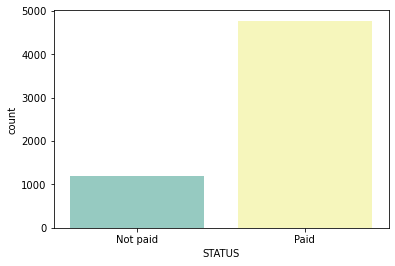

In [54]:
ax = sns.countplot(x='STATUS', data=data, palette='Set3')

Видно несбалансированность классов, попробуем избавиться от нее на этапе обучения

Далее посмотрим на распределение остальных категориальных признаков

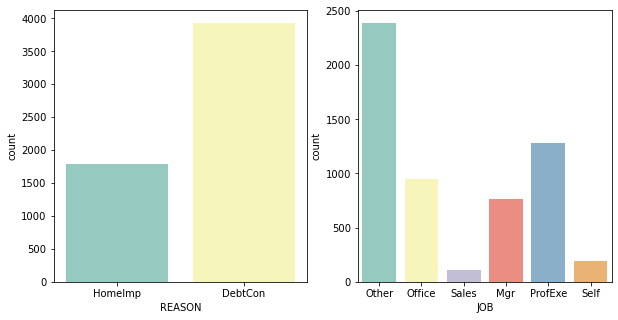

In [55]:
fig, ax =plt.subplots(1,2, figsize=(10, 5))
sns.countplot(x='REASON', data=data, palette='Set3', ax=ax[0])
sns.countplot(x='JOB', data=data, palette='Set3', ax=ax[1])
pass

видно, что только треть людей берет кредит на улучшение дома

In [68]:
g = data.groupby('JOB')
print(g)
a = g['STATUS'].value_counts(normalize=True).to_frame().style.format('{:.1%}')
sns.countplot(a)

C:\Users\79200\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'bool' object has no attribute 'all'